In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install statsmodels 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn import metrics

%matplotlib inline

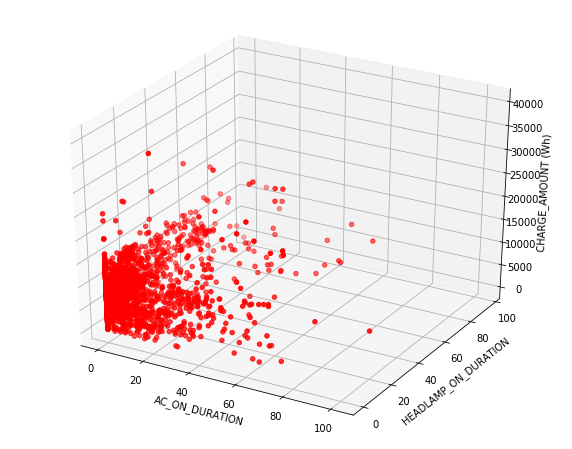

In [3]:
#read in raw data
KW = pd.read_excel(r"C:\Users\taram\Desktop\EV_data_2.xlsx")
#KW = KW.plot.scatter(x='Percent Lost SOC',y=' CHARGE_AMOUNT (Wh)',figsize=(8,6))
#KW = KW.plot.scatter(x=' AC_ON_DURATION',y='Percent Lost SOC',figsize=(8,6))
#KW = KW.plot.scatter(x=' HEADLAMP_ON_DURATION',y='Percent Lost SOC',figsize=(8,6))
BS = KW.drop([' TRIP_DISTANCE',' TEL_AVG_VELOCITY','Difference of trip times','Percent Lost SOC','diff c-time (min)'], axis =1)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = BS[[' AC_ON_DURATION']]
y = BS[[' HEADLAMP_ON_DURATION']]
z = BS[[' CHARGE_AMOUNT (Wh)']]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('AC_ON_DURATION')
ax.set_ylabel('HEADLAMP_ON_DURATION')
ax.set_zlabel('CHARGE_AMOUNT (Wh)')

plt.show()

c:\users\taram\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


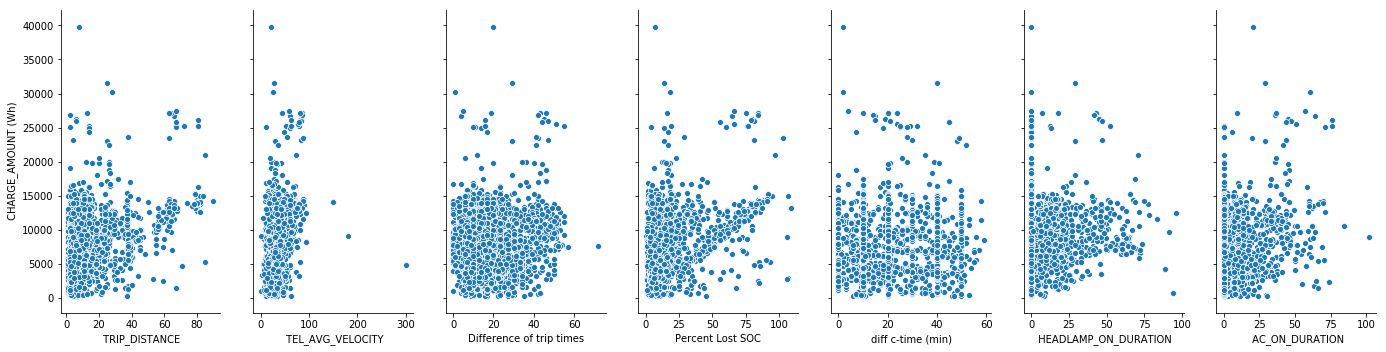

In [4]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(KW, x_vars=[' TRIP_DISTANCE',' TEL_AVG_VELOCITY','Difference of trip times','Percent Lost SOC','diff c-time (min)',' HEADLAMP_ON_DURATION',' AC_ON_DURATION'], y_vars=' CHARGE_AMOUNT (Wh)', size=5,aspect =0.55)

In [5]:
KWn =(KW-KW.values.min())/(KW.values.max()-KW.values.min()) #Normalize
KW.head()

,TRIP_DISTANCE,Difference of trip times,Percent Lost SOC,TEL_AVG_VELOCITY,AC_ON_DURATION,HEADLAMP_ON_DURATION,diff c-time (min),CHARGE_AMOUNT (Wh)
0,34,37,34,55.14,36.83,0.0,20,4129
1,30,37,30,50.27,19.00,0.0,30,4765
2,5,13,10,23.08,13.25,0.0,20,2834
3,85,5,93,41.28,2.05,0.0,0,5174
4,19,27,20,44.44,27.07,0.0,20,6562


In [6]:
train_X = KWn.iloc[0:1200, 0:7]
train_Y = KWn.iloc[0:1200, 7:8]
#print(train_X)
#print(train_Y)

In [7]:
test_X = KWn.iloc[1201:1891, 0:7]
test_Y = KWn.iloc[1201:1891, 7:8]
#print(test_X)
#print(test_Y)


In [8]:
reg = LinearRegression()
reg.fit(train_X,train_Y)            #You will get model after this step
reg_predict_y= reg.predict(test_X)
#reg.coef_                           #Number of coeffiecnts = number of columns
#reg.intercept_ 
#reg_predict_y
clf = Ridge(alpha=1.0)
clf.fit(train_X,train_Y) #You will get model after this step
clf_predict_y = clf.predict(test_X)
#clf.coef_ 
lasso = Lasso(alpha=0.1)
lasso.fit(train_X,train_Y) #You will get model after this step
lasso_predict_y = lasso.predict(test_X)
#lasso.coef_

In [9]:
# calculate MAE, MSE, RMSE
print('----------LinearRegression')
print(metrics.mean_absolute_error(test_Y, reg_predict_y ))          #MAE
print(metrics.mean_squared_error(test_Y, reg_predict_y ))           #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, reg_predict_y )))  #RMSE
print('-----------RidgeRegression')
print(metrics.mean_absolute_error(test_Y, clf_predict_y))          #MAE
print(metrics.mean_squared_error(test_Y, clf_predict_y ))          #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, clf_predict_y ))) #RMSE
print('----------LassoRegression')
print(metrics.mean_absolute_error(test_Y, lasso_predict_y))         #MAE
print(metrics.mean_squared_error(test_Y, lasso_predict_y))          #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, lasso_predict_y))) #RMSE

----------LinearRegression
0.07909068862499355
0.009881557272165569
0.09940602231336675
-----------RidgeRegression
0.0860051817130192
0.01115696507666901
0.10562653585472265
----------LassoRegression
0.08601237789026263
0.011158800192535557
0.10563522231024819


In [10]:
results = sm.OLS(test_Y, test_X).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:      CHARGE_AMOUNT (Wh)   R-squared:                       0.741
Model:                             OLS   Adj. R-squared:                  0.738
Method:                  Least Squares   F-statistic:                     279.1
Date:                 Mon, 18 Feb 2019   Prob (F-statistic):          1.40e-195
Time:                         12:44:45   Log-Likelihood:                 542.42
No. Observations:                  690   AIC:                            -1071.
Df Residuals:                      683   BIC:                            -1039.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
 TRIP_DISTANCE

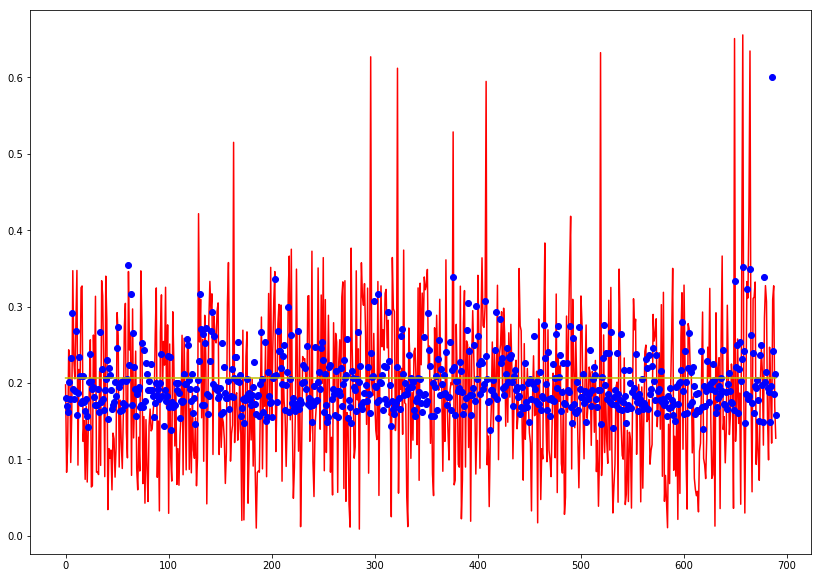

In [11]:
#PLOT
plt.figure(figsize=(14,10))
plt.plot(np.array(test_Y), 'r-',reg_predict_y,'bo', clf_predict_y,'y-')

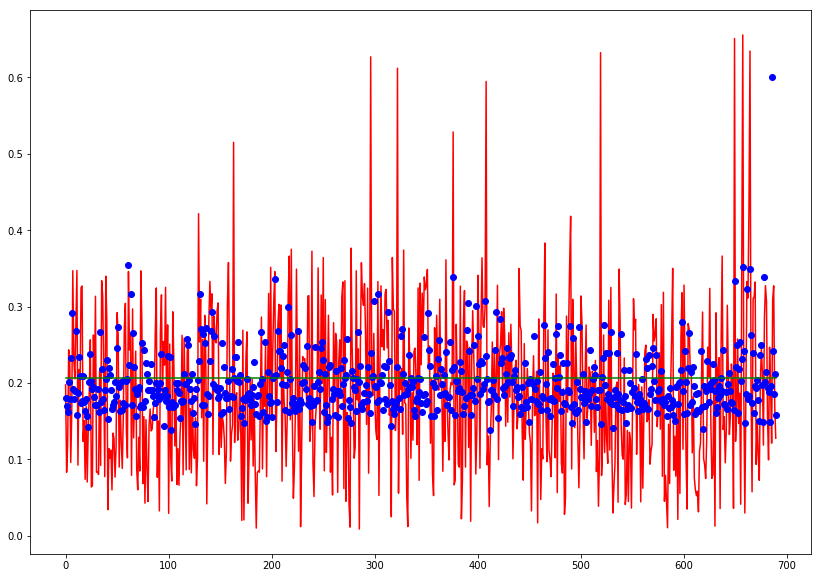

In [12]:
plt.figure(figsize=(14,10))
plt.plot(np.array(test_Y), 'r-',reg_predict_y,'bo',lasso_predict_y,'g-')

In [13]:
#Dropping velocity and Trip time
KWv = pd.read_excel(r"C:\Users\taram\Desktop\EV_data_2.xlsx")
KWv = KWv.drop([' TEL_AVG_VELOCITY', 'Difference of trip times'], axis =1)
KWv.head()

,TRIP_DISTANCE,Percent Lost SOC,AC_ON_DURATION,HEADLAMP_ON_DURATION,diff c-time (min),CHARGE_AMOUNT (Wh)
0,34,34,36.83,0.0,20,4129
1,30,30,19.00,0.0,30,4765
2,5,10,13.25,0.0,20,2834
3,85,93,2.05,0.0,0,5174
4,19,20,27.07,0.0,20,6562


----------LinearRegression
0.08370280482339802
0.011474416611119585
0.10711870336743058
-----------RidgeRegression
0.08933813518852239
0.012823318865600838
0.11324009389611454
----------LassoRegression
0.08934199139039148
0.012824420203518639
0.11324495663612856


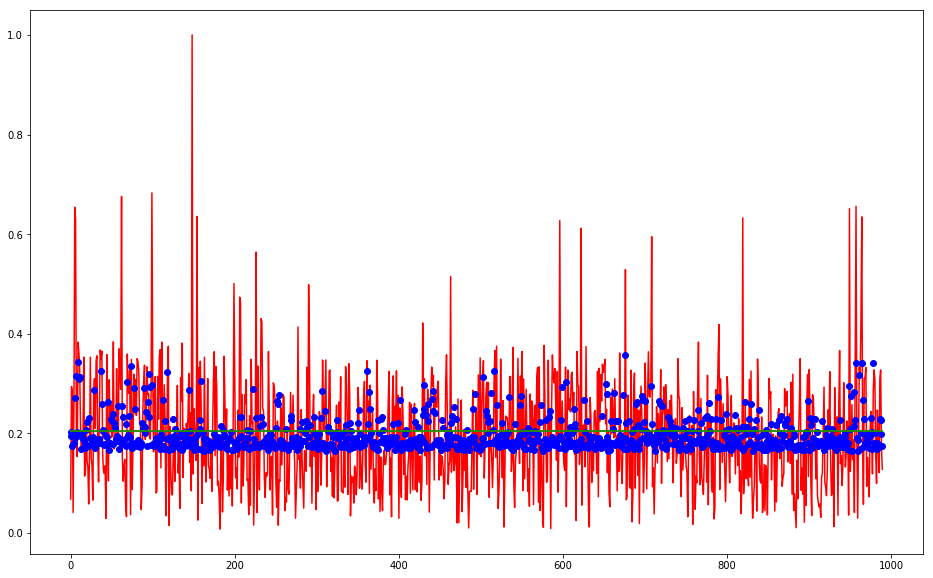

In [14]:
#Dropping velocity and Trip time
#Normalize
KWnz =(KWv-KWv.values.min())/(KWv.values.max()-KWv.values.min()) #Normalize
KWnz.head()
#train_X= KW.iloc['TRIP_DISTANCE',KW.columns[1:2]]
#train_Y= KW.iloc['TRIP_DISTANCE',KW.columns[0:1]]
train_X = KWnz.iloc[0:900, 0:5]
train_Y = KWnz.iloc[0:900, 5:6]
#print(train_X)
#print(train_Y)
test_X = KWnz.iloc[901:1891, 0:5]
test_Y = KWnz.iloc[901:1891, 5:6]
#print(test_X)
#print(test_Y)
#############################LinearRegression#########################################
reg = LinearRegression()
reg.fit(train_X,train_Y)            #You will get model after this step
reg_predict_y= reg.predict(test_X)
#reg.coef_                           #Number of coeffiecnts = number of columns
#reg.intercept_ 
#reg_predict_y

# define true and predicted response values
test_Y
reg_predict_y 

# calculate MAE, MSE, RMSE
print('----------LinearRegression')
print(metrics.mean_absolute_error(test_Y, reg_predict_y ))          #MAE
print(metrics.mean_squared_error(test_Y, reg_predict_y ))           #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, reg_predict_y )))  #RMSE
########################################################################################
#############################RidgeRegression#########################################
clf = Ridge(alpha=1.0)
clf.fit(train_X,train_Y) #You will get model after this step
clf_predict_y = clf.predict(test_X)
clf.coef_ 
print('-----------RidgeRegression')
print(metrics.mean_absolute_error(test_Y, clf_predict_y))          #MAE
print(metrics.mean_squared_error(test_Y, clf_predict_y ))          #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, clf_predict_y ))) #RMSE
########################################################################################
#############################LassoRegression#########################################
lasso = Lasso(alpha=0.1)
lasso.fit(train_X,train_Y) #You will get model after this step
lasso_predict_y = lasso.predict(test_X)
#lasso.coef_
print('----------LassoRegression')
print(metrics.mean_absolute_error(test_Y, lasso_predict_y))         #MAE
print(metrics.mean_squared_error(test_Y, lasso_predict_y))          #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, lasso_predict_y))) #RMSE
########################################################################################

#PLOT
plt.figure(figsize=(16,10))
plt.plot(np.array(test_Y), 'r-',reg_predict_y,'bo', clf_predict_y,'y-',lasso_predict_y,'g-')

In [15]:
results = sm.OLS(test_Y , test_X).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:      CHARGE_AMOUNT (Wh)   R-squared:                       0.645
Model:                             OLS   Adj. R-squared:                  0.643
Method:                  Least Squares   F-statistic:                     357.9
Date:                 Mon, 18 Feb 2019   Prob (F-statistic):          1.32e-218
Time:                         12:44:48   Log-Likelihood:                 577.80
No. Observations:                  990   AIC:                            -1146.
Df Residuals:                      985   BIC:                            -1121.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
 TRIP_DISTANCE      

In [16]:
#Dropping Trip Time
KWv = pd.read_excel(r"C:\Users\taram\Desktop\EV_data_2.xlsx")
KWv = KWv.drop(['Difference of trip times'], axis =1)
KWv.head()

,TRIP_DISTANCE,Percent Lost SOC,TEL_AVG_VELOCITY,AC_ON_DURATION,HEADLAMP_ON_DURATION,diff c-time (min),CHARGE_AMOUNT (Wh)
0,34,34,55.14,36.83,0.0,20,4129
1,30,30,50.27,19.00,0.0,30,4765
2,5,10,23.08,13.25,0.0,20,2834
3,85,93,41.28,2.05,0.0,0,5174
4,19,20,44.44,27.07,0.0,20,6562


----------LinearRegression
0.08243928454099285
0.011469887344107385
0.107097559935357
-----------RidgeRegression
0.08933673713457797
0.012822961924756968
0.11323851784952402
----------LassoRegression
0.08934199139039148
0.012824420203518639
0.11324495663612856


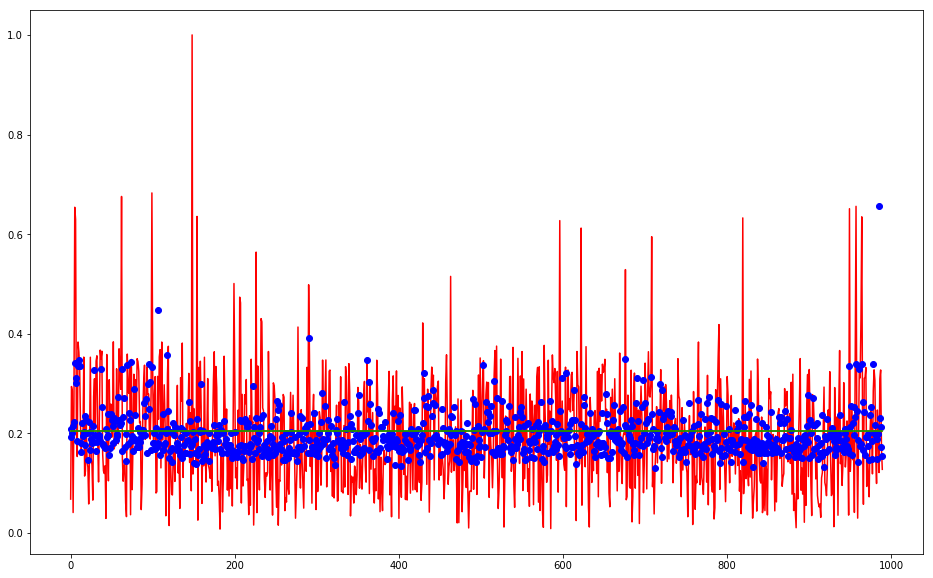

In [17]:
#Dropping Trip Time
#Normalize
KWnz =(KWv-KWv.values.min())/(KWv.values.max()-KWv.values.min()) #Normalize
KWnz.head()
train_X = KWnz.iloc[0:900, 0:6]
train_Y = KWnz.iloc[0:900, 6:7]
#print(train_X)
#print(train_Y)
test_X = KWnz.iloc[901:1891, 0:6]
test_Y = KWnz.iloc[901:1891, 6:7]
#print(test_X)
#print(test_Y)
#############################LinearRegression#########################################
reg = LinearRegression()
reg.fit(train_X,train_Y)            #You will get model after this step
reg_predict_y= reg.predict(test_X)
#reg.coef_                           #Number of coeffiecnts = number of columns
#reg.intercept_ 
#reg_predict_y

# define true and predicted response values
test_Y
reg_predict_y 

# calculate MAE, MSE, RMSE
print('----------LinearRegression')
print(metrics.mean_absolute_error(test_Y, reg_predict_y ))          #MAE
print(metrics.mean_squared_error(test_Y, reg_predict_y ))           #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, reg_predict_y )))  #RMSE
########################################################################################
#############################RidgeRegression#########################################
clf = Ridge(alpha=1.0)
clf.fit(train_X,train_Y) #You will get model after this step
clf_predict_y = clf.predict(test_X)
clf.coef_ 
print('-----------RidgeRegression')
print(metrics.mean_absolute_error(test_Y, clf_predict_y))          #MAE
print(metrics.mean_squared_error(test_Y, clf_predict_y ))          #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, clf_predict_y ))) #RMSE
########################################################################################
#############################LassoRegression#########################################
lasso = Lasso(alpha=0.1)
lasso.fit(train_X,train_Y) #You will get model after this step
lasso_predict_y = lasso.predict(test_X)
#lasso.coef_
print('----------LassoRegression')
print(metrics.mean_absolute_error(test_Y, lasso_predict_y))         #MAE
print(metrics.mean_squared_error(test_Y, lasso_predict_y))          #MSE
print(np.sqrt(metrics.mean_squared_error(test_Y, lasso_predict_y))) #RMSE
########################################################################################

#PLOT
plt.figure(figsize=(16,10))
plt.plot(np.array(test_Y), 'r-',reg_predict_y,'bo', clf_predict_y,'y-',lasso_predict_y,'g-')

In [18]:
results = sm.OLS(test_Y, test_X).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:      CHARGE_AMOUNT (Wh)   R-squared:                       0.719
Model:                             OLS   Adj. R-squared:                  0.717
Method:                  Least Squares   F-statistic:                     419.0
Date:                 Mon, 18 Feb 2019   Prob (F-statistic):          6.12e-267
Time:                         12:44:50   Log-Likelihood:                 692.99
No. Observations:                  990   AIC:                            -1374.
Df Residuals:                      984   BIC:                            -1345.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
 TRIP_DISTANCE      